#목표

주어진 패스트캠퍼스 데이터를 통해 어떤 요인이 패스트캠퍼스 이용자들의 구매를 이끌어내는지 분석해보고, 이를 통해 매출을 상승시킬 수 있는 방안을 제시해본다.

>주제: 매출에 영향을 끼치는 요인 분석

- 강의 수요도
1. 카테고리별 환불 수량 및 비율

- 할인 혜택
1. 할인 타입별 총 결제량, 전체 매출
2. 같은 카테고리기준으로 할인 혜택을 받은 사람과 안받은 사람의 비율

- 추가 결제율
1. 웰컴쿠폰 사용자 중 카테고리별 구매기록 분석
2. 동일한 결제 수단으로 결제 여부

- 강의 가격
1. 카테고리별 가격대에 따른 실 판매량 분석





#데이터 살펴보기


In [ ]:
#프로젝트를 진행함에 필요한 모듈을 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#한글화
plt.rc('font', family='AppleGothic')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
#파이널프로젝트_RAW_210329_210926.xlsx 마운팅 후 DataFrame으로 불러오기
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_excel('/content/drive/MyDrive/미니프로젝트/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


| 컬럼 | 설명 |
| ---- | ----|
| id | 데이터 처리 내역 |
| customer_id | 고객 고유 번호 |
| course_id | 강의 고유 번호 |
| type    | 고객의 요청사항 종류 |
| state                   | type의 진행상황 |
| course_title            | 강의 제목 |
| category_title          | 강의 카테고리 제목 |
|format         | 강의 과정 분류 종류|
| completed_at            | 강의 결제 완료 시각|
| transaction_amount      | 실 결제 금액|
| coupon_title            | 쿠폰명|
| coupon_discount_amount  | 할인된 금액|
| sale_price              | 판매 금액|
| tax_free_amount    | 면세액 |
| pg                      | 결제대행사 |
| method                  | 결제 방법|
| subcategory_title       | 강의 부 카테고리 제목|
| marketing_start_at      | 해당 강의가 개시된 날 |


____
<유의할 사항>
- 쿠폰 말고도 이벤트같은 다른 조건에 의한 할인도 있다
- 'customer_id'는 중복값이 있으므로 순수 고객수 파악하려면 전처리 필요
- 'tax_free_amount' 데이터는 개인 보안 문제로 제거해주기
- 'course_id'의 결측치는 폐강으로 추측
- 'pg'의 결측치는 주어진 결제대행사 외의 기업을 뜻한다.

#데이터 타입과 결측값 확인하기

>데이터 타입과 결측값 확인하기

1. 데이터 타입 확인

In [ ]:
#데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

2. 결측치 확인 및 제거

In [ ]:
#결측치 확인
df.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [ ]:
#결측치 제거
df['coupon_title'] = df['coupon_title'].replace(np.NaN,'NaN')


#sale_price, coupon_discount_amount  NaN값 0.0으로 변경
df['sale_price'] = df['sale_price'].replace(np.NaN,0.0)
df['coupon_discount_amount'] = df['coupon_discount_amount'].replace(np.NaN,0.0)

In [ ]:
# 카테고리가 누락된 강의들은 폐강된 강의들이므로 해당 row를 제거해준다
df = df.dropna(subset=['category_title'])

>사용하지 않는 컬럼 제거

- id는 단순히 자료 처리 순서이므로 삭제한다.

- tax_free_amount는 보안상의 이유로 삭제한다.

- 'format','completed_at','marketing_start_at'컬럼은 분석에 사용하지 않으므로 삭제한다.

In [ ]:
# 'id'와'tax_free_amount' 컬럼 제거
df = df.drop(['id','tax_free_amount','format','completed_at','marketing_start_at'],axis = 'columns')
df.head()

,customer_id,course_id,type,state,course_title,category_title,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title
0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,90500,NaN,0.0,110500.0,NaN,VBANK,개발자 커리어
1,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,96000,NaN,0.0,116000.0,NaN,CARD,영상 편집
2,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN
3,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,171810,NaN,0.0,190900.0,NaN,CARD,NaN
4,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서


#데이터 정제

>카테고리 컬럼 수정

In [ ]:
df['category_title'].value_counts().to_frame()

,category_title
프로그래밍,34430
데이터사이언스,14076
업무 생산성,13323
디자인,12009
영상/3D,10260
마케팅,9857
부동산/금융,5523
투자/재테크,2501
크리에이티브,2250
교육,1031


  위의 표를 보고 처리할 과정을 정리해보았다.
  
  <수정 할 목록>
1. 띄어쓰기 차이로 다른 강의로 구분된 '데이터사이언스'와 '데이터 사이언스'를 합쳐준다.
2. 디자인 카테고리에 서브 카테고리로 속해있는 '일러스트' 카테고리를 '디자인'카테고리에 편입시켜준다.
3. '크리에이티브','교육','지식콘텐츠','비즈니스','파이낸스','관리' 카테고리는 현재 폐강된 카테고리들로 삭제해준다.

In [ ]:
# 카테고리 변경
df =df.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
df =df.replace({'category_title':{'일러스트':'디자인'}})


# 불필요한 카테고리 삭제
df = df[df.category_title != '크리에이티브']
df = df[df.category_title != '교육']
df = df[df.category_title != '지식콘텐츠']
df = df[df.category_title != '비즈니스']
df = df[df.category_title != '파이낸스']
df = df[df.category_title != '관리']

df.category_title.value_counts()

프로그래밍      34430
데이터사이언스    14085
업무 생산성     13323
디자인        12010
영상/3D      10260
마케팅         9857
부동산/금융      5523
투자/재테크      2501
Name: category_title, dtype: int64

> 순수 결제내역 / 순수 환불내역 분류하기

In [ ]:
# 결제가 완료된 사람의 데이터
df_pc = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]


# 환불이 완료된 사람의 데이터
df_rc =df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]


# 결제가 완료된 사람과 환불이 완료된 사람의 데이터를 합쳐준다.
df_total = pd.merge(df_pc,df_rc,how='outer')


# 합친 데이터 중에서 'customer_id' , 'course_title','coupon_title' 모두를 만족하는 중복값을 가장 최신값만 남기고 제거해준다.
df_total = df_total.drop_duplicates(['customer_id' , 'course_title','coupon_title'],keep = 'last')
df_total['type'].value_counts()

PAYMENT    49625
REFUND      3645
Name: type, dtype: int64

In [ ]:
# 중복값을 제거한 df_total 데이터 중 type이 payment면 패캠 이용자들의 순 구매 내역,
df_pay = df_total['type'] == 'PAYMENT'
df_pay = df_total[df_pay]


# type이 refund면 패캠 이용자들의 순 환불 내역이다.
df_refund = df_total['type'] == 'REFUND'
df_refund = df_total[df_refund]

#데이터 분포 확인하기

#강의 수요도
>카테고리별 환불 수량 및 비율

In [ ]:
#메인 카테고리별로 환불된 개수와 비율을 별도의 데이터프레임으로 구분
AA = []
AB = []
AC = []
AD = []
for j in df_total['category_title'].unique():
  AD.append(j)
  x = ((df_total['category_title'] == j) & (df_total['state'] == 'COMPLETED') & (df_total['type'] == 'PAYMENT')).sum()
  AA.append(x)
  y = ((df_total['category_title'] == j) & (df_total['state'] == 'COMPLETED') & (df_total['type'] == 'REFUND')).sum()
  AB.append(y)
  AC.append(y / x)

시각화첫번째 = pd.DataFrame({'pay_complete':AA,
                          'pay_refund':AB,
                          '비율':AC,
                          '카테고리':AD})
시각화첫번째 = 시각화첫번째.dropna()
시각화첫번째

,pay_complete,pay_refund,비율,카테고리
0,17006,1431,0.084147,프로그래밍
1,6512,337,0.051751,업무 생산성
2,5036,362,0.071882,영상/3D
3,2808,145,0.051638,부동산/금융
4,6659,448,0.067277,데이터사이언스
5,5594,456,0.081516,디자인
6,4563,359,0.078676,마케팅
7,1447,107,0.073946,투자/재테크


전체 결제기록 중 환불된 비율을 나타낸 표

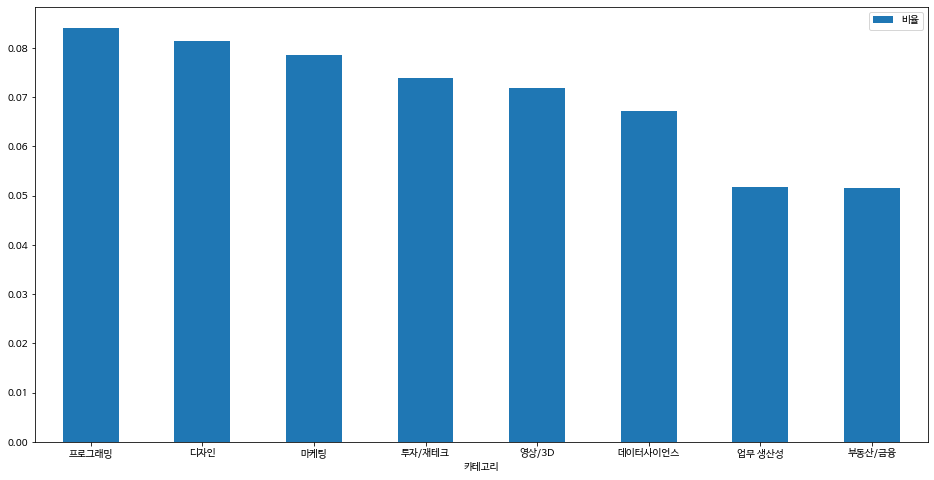

In [ ]:
#위에 있는 데이터프레임을 시각화
시각화첫번째.sort_values(by=['비율'],ascending=False).plot.bar(x='카테고리', y='비율', rot=0, figsize=(16,8))

>서브 카테고리별로 환불된 개수와 비율

In [ ]:
#서브 카테고리별로 환불된 개수와 비율을 별도의 데이터프레임으로 구분
DA = []
DB = []
DC = []
DD = []
for j in df_total['subcategory_title'].unique():
  DD.append(j)
  x = ((df_total['subcategory_title'] == j) & (df_total['state'] == 'COMPLETED') & (df_total['type'] == 'PAYMENT')).sum()
  DA.append(x)
  y = ((df_total['subcategory_title'] == j) & (df_total['state'] == 'COMPLETED') & (df_total['type'] == 'REFUND')).sum()
  DB.append(y)
  DC.append(y / x)

시각화서브 = pd.DataFrame({'pay_complete':DA,
                          'pay_refund':DB,
                          '비율':DC,
                          '서브카테고리':DD})
시각화서브 = 시각화서브.dropna()
시각화서브

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


,pay_complete,pay_refund,비율,서브카테고리
1,2023,121,0.059812,PPT/보고서
2,3546,241,0.067964,영상 편집
3,2662,230,0.086401,프론트엔드 개발
4,1175,74,0.062979,DevOps
5,1285,112,0.087160,UX/UI
6,1030,69,0.066990,머신러닝
7,934,70,0.074946,모션그래픽
8,2258,120,0.053144,딥러닝/인공지능
9,1643,97,0.059038,글쓰기/카피라이팅
10,832,54,0.064904,디지털마케팅


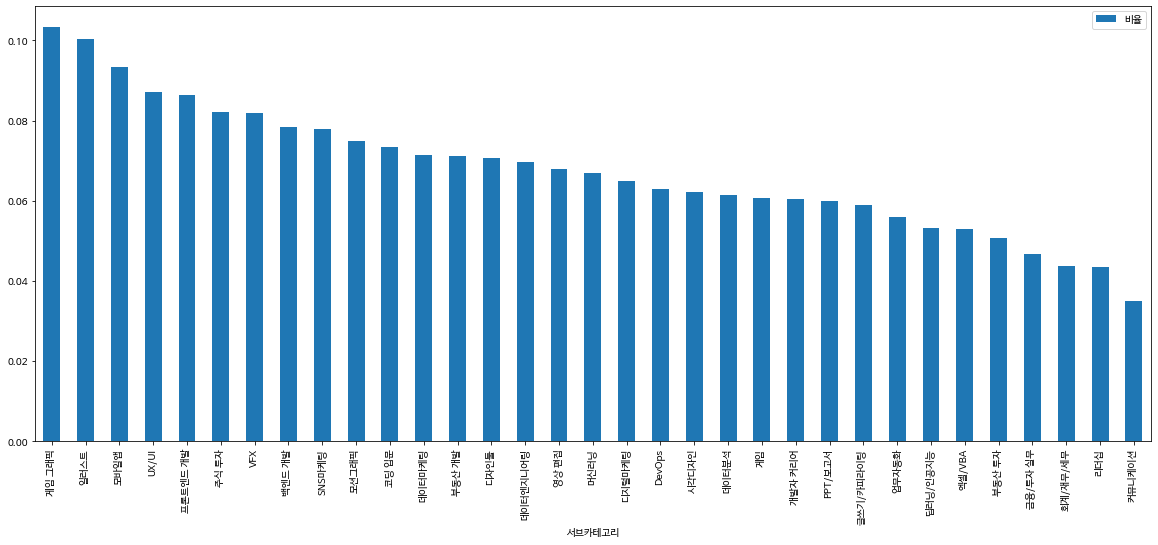

In [ ]:
#위에 있는 데이터프레임을 시각화
시각화서브.sort_values(by=['비율'],ascending=False).plot.bar(x='서브카테고리', y='비율', rot=90, figsize=(20,8))

어떤 카테고리가 환불율이 높은지 분석해 본 결과, 

환불율이 8%로 타 과목들보다 환불율이 높은 '프로그래밍','디자인' 강의는 수강자들의 만족도 검사 혹은 강의평가 등을 통해 강의목록 개편을 권유합니다.

서브 카테고리 항목에서는 '게임그래픽','일러스트','모바일앱' 강의들이 수강생들의 기대치를 충족 못 하는 것으로 보여집니다.
수강생들이 강의를 끝까지 이수할 수 있도록 보다 흥미로운 강의를 만들도록 노력이 요구됩니다.

> 카테고리 별 환불된 결제 내역

In [ ]:
# 이전 정제된 데이터에서 REFUND.COMPLETED 데이터 추출
refund_df = df_total[(df_total['type'] == 'REFUND') & (df_total['state'] == 'COMPLETED')]
refund_value_df = refund_df['category_title'].value_counts()

Text(0, 0.5, '')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


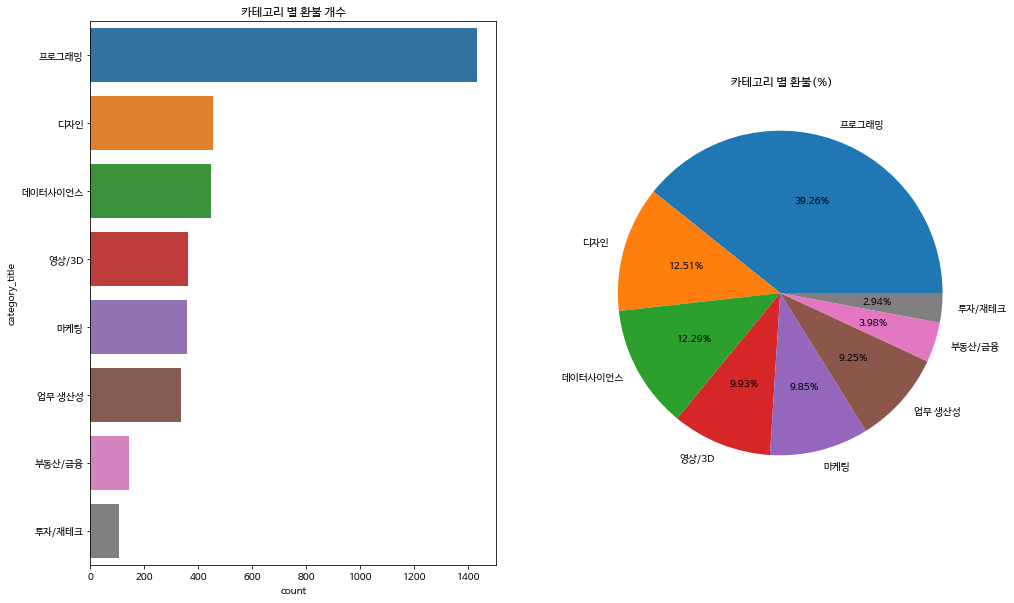

In [ ]:
# 카테고리별 환불 개수
fig = plt.figure(figsize=(16,10))
graph_1 = fig.add_subplot(1,2,1)
graph_2 = fig.add_subplot(1,2,2)

sns.countplot(data=refund_df, y='category_title', ax=graph_1, order=['프로그래밍', '디자인','데이터사이언스', '영상/3D', '마케팅', '업무 생산성', '부동산/금융', '투자/재테크'])
graph_1.set_title('카테고리 별 환불 개수')

refund_value_df.plot.pie(autopct='%1.2f%%',ax=graph_2, subplots=True)
graph_2.set_title('카테고리 별 환불(%)')
graph_2.set_ylabel('')

프로그래밍 과목이 인기가 많음에도 환불비율이 높은 이유가

프로그래밍이라는 과목 특성상 난이도가 높은 과목이지만, 과목의 난이도에 대한 충분한 설명이 없어 많은 환불 요청이 발생한 것 같다.

이용자들이 강의에 대한 충분한 이해가 이뤄지도록 상세한 설명이 필요해 보인다.

# 할인 혜택
1. 할인 타입별 총 결제량, 전체 매출


In [ ]:
#할인금액 분석에서 사용할 데이터 프레임 생성
df_onlypay = df_pay[['customer_id','sale_price','transaction_amount','coupon_discount_amount']]


# 얼마 할인받는지 계산
df_onlypay['discounted_amount'] = df_onlypay['sale_price'] - df_onlypay['transaction_amount']


# 실구매 가격 대비 할인율 계산
df_onlypay['discount_percent'] = df_onlypay['discounted_amount'] *100 / df_onlypay['sale_price']
df_onlypay['discount_percent'] = df_onlypay['discount_percent'].replace(np.inf,100.0)



#쿠폰 할인외에 이벤트 할인받은 데이터가 있는지 확인
only_coupon = (df_onlypay['coupon_discount_amount'] > 0)
only_coupon.value_counts() 
#쿠폰 할인 받은 사람 : 23519  // 쿠폰 할인 못 받은 사람: 26106

only_teacher = (df_onlypay['coupon_discount_amount'] != df_onlypay['discounted_amount']) & (df_onlypay['coupon_discount_amount'] == 0) & (df_onlypay['discounted_amount'] < 0)
only_teacher.value_counts() 
#패스트캠퍼스 강사진 전용 이벤트 할인: 124

only_event = (df_onlypay['coupon_discount_amount'] != df_onlypay['discounted_amount']) & (df_onlypay['coupon_discount_amount'] == 0) & (df_onlypay['discounted_amount'] > 0)
only_event.value_counts() 
#이벤트 할인 받은 사람 : 1279   // 이벤트 할인 못 받은 사람: 48222 


not_discount = (df_onlypay['coupon_discount_amount'] == df_onlypay['discounted_amount']) & (df_onlypay['discounted_amount'] == 0)
not_discount .value_counts()
#할인 못받은 사람: 24703   // 할인 받은사람: 24922 

#할인 받은 사람: 23519 + 1279 + 124= 24922 명 (검산결과 맞음!)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

False    24922
True     24703
dtype: int64

>구매 기록과 환불기록 분류하기

In [ ]:
# 할인 타입 컬럼 만들기
df_onlypay['discount_type'] = pd.Series()


# 쿠폰 할인을 안받고 구매한 그룹
df_not_discount = df_onlypay[not_discount]
df_not_discount['discount_type']='X'

# 쿠폰 할인을 받고 구매한 그룹
df_coupon = df_onlypay[only_coupon]
df_coupon['discount_type']='coupon'

# 이벤트 할인을 받고 구매한 그룹
df_event = df_onlypay[only_event]
df_event['discount_type']='event'

# 패스트캠퍼스 강사진 전용 이벤트 할인
df_only_teacher = df_onlypay[only_teacher]
df_only_teacher['discount_type']='only teacher'


#할인 타입 합치기
df_onlypay = pd.concat([df_not_discount,df_coupon,df_event])
df_onlypay

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykerne

,customer_id,sale_price,transaction_amount,coupon_discount_amount,discounted_amount,discount_percent,discount_type
3,469860.0,263000.0,263000,0.0,0.0,0.000000,X
5,478031.0,299000.0,299000,0.0,0.0,0.000000,X
6,455311.0,149500.0,149500,0.0,0.0,0.000000,X
8,478051.0,118000.0,118000,0.0,0.0,0.000000,X
9,131687.0,81000.0,81000,0.0,0.0,0.000000,X
...,...,...,...,...,...,...,...
48177,655839.0,233000.0,72000,0.0,161000.0,69.098712,event
49629,664295.0,329000.0,309000,0.0,20000.0,6.079027,event
50118,666671.0,159000.0,139000,0.0,20000.0,12.578616,event
50244,667266.0,123000.0,113000,0.0,10000.0,8.130081,event


>할인율에 따라 분류

In [ ]:
#할인 받은 금액(%)에 따라 분류하는 함수 만들기
def func(x):
  if x == 0:
    return "비 할인"  
  elif  x < 10:
    return "~10%"
  elif x < 20:
    return "~20%"
  elif x < 30:
    return "~30%"
  elif  x < 40:
    return "~40%"
  elif  x < 50:
    return "~50%"
  elif  x < 60:
    return "~60%"
  elif  x < 70:
    return "~70%"
  elif  x < 80:
    return "~80%"
  elif  x < 90:
    return "~90%"
  elif x ==100:
    return "전액 할인"
  else:
    return "강사진 전용"

df_onlypay['discount_rate'] = (df_onlypay['discount_percent']).apply(func)

>시각화

1. 할인 타입별 결제 횟수, 비율, 총 판매 금액

2. 할인 타입별 매출과 할인율의 관계

3. 타입별(그래프 3개) 할인 금액에 따른 전체 결제 횟수, 전체 판매 금액


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


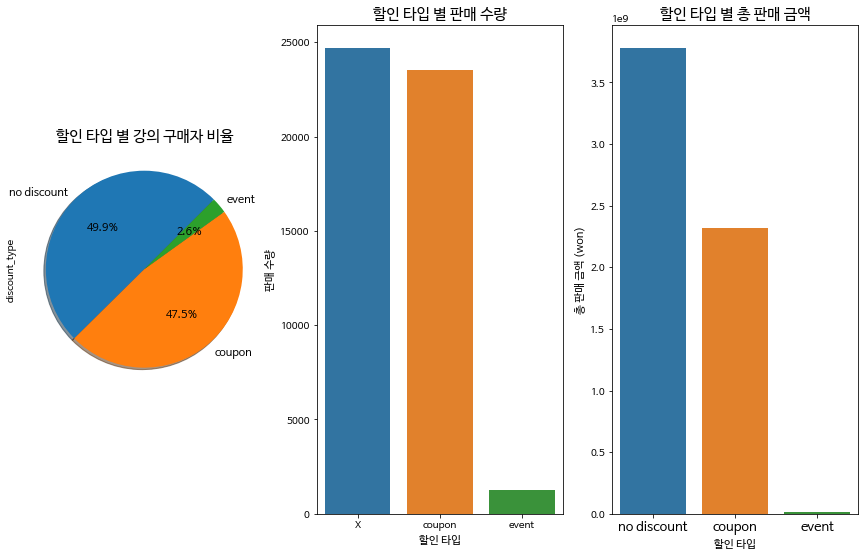

In [ ]:
#할인 타입별 결제횟수, 비율, 총 판매 금액
plt.figure(figsize=(15, 9))

#할인 타입 비율
plt.subplot(1,3,1)
labels = ['no discount','coupon','event']
df_onlypay["discount_type"].value_counts().plot.pie( explode=[0,0,0],labels = labels, autopct='%1.1f%%', shadow=True,startangle=45,fontsize = 11)
plt.title('할인 타입 별 강의 구매자 비율',fontsize = 15)


#할인 타입별 결제 횟수
plt.subplot(1,3,2)
sns.countplot(data=df_onlypay,x='discount_type')
plt.title('할인 타입 별 판매 수량',fontsize =15)
plt.xlabel('할인 타입',fontsize = 11)
plt.ylabel('판매 수량',fontsize = 11)


#할인 타입별 총 판매 금액
revenue_of_discount_type = df_onlypay.groupby('discount_type').transaction_amount.sum()

plt.subplot(1,3,3)
labels = ['no discount','coupon','event']
index = np.arange(len(labels))
sns.barplot(index,revenue_of_discount_type)
plt.title('할인 타입 별 총 판매 금액',fontsize = 15)
plt.xlabel('할인 타입',fontsize = 11)
plt.ylabel('총 판매 금액 (won)',fontsize = 11)
plt.xticks(index,labels,fontsize = 13)

plt.show()

할인타입 별로 강의 결제자의 비율과 결제량, 총 매출을 알아보았다. 쿠폰 비 사용자와 비교해봤을 때 예상보다 이용자들의 쿠폰 사용율이 높게 나왔다. 이용자들이 강의를 결제하기에 쿠폰의 영향이 있음을 알 수 있다.

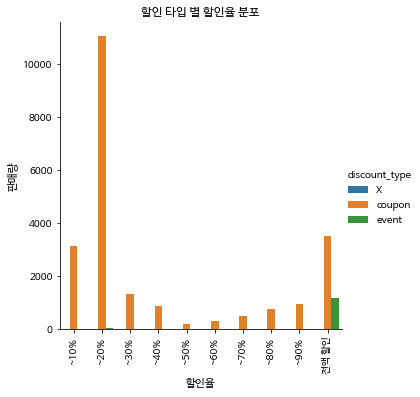

In [ ]:
#할인 타입별 할인율 분포
df_onlypay2 = df_onlypay[(df_onlypay['discount_rate']!='not discounted')]

sns.catplot(x='discount_rate', hue='discount_type', kind='count', data=df_onlypay2
            , order=['~10%','~20%','~30%','~40%','~50%','~60%','~70%','~80%','~90%','전액 할인'])
plt.title('할인 타입 별 할인율 분포')
plt.xlabel('할인율',fontsize = 11)
plt.ylabel('판매량',fontsize = 11)
plt.xticks(rotation=90)
plt.show()

강의의 정가 대비 할인받은 금액에 따라 그룹화 한 결과, 20% 할인을 했을 때 많이 사용한 결과를 보였다.
결제자들이 정가의 20%정도를 할인해 줄 경우를 가장 선호한다. 

Text(0, 0.5, '할인율')

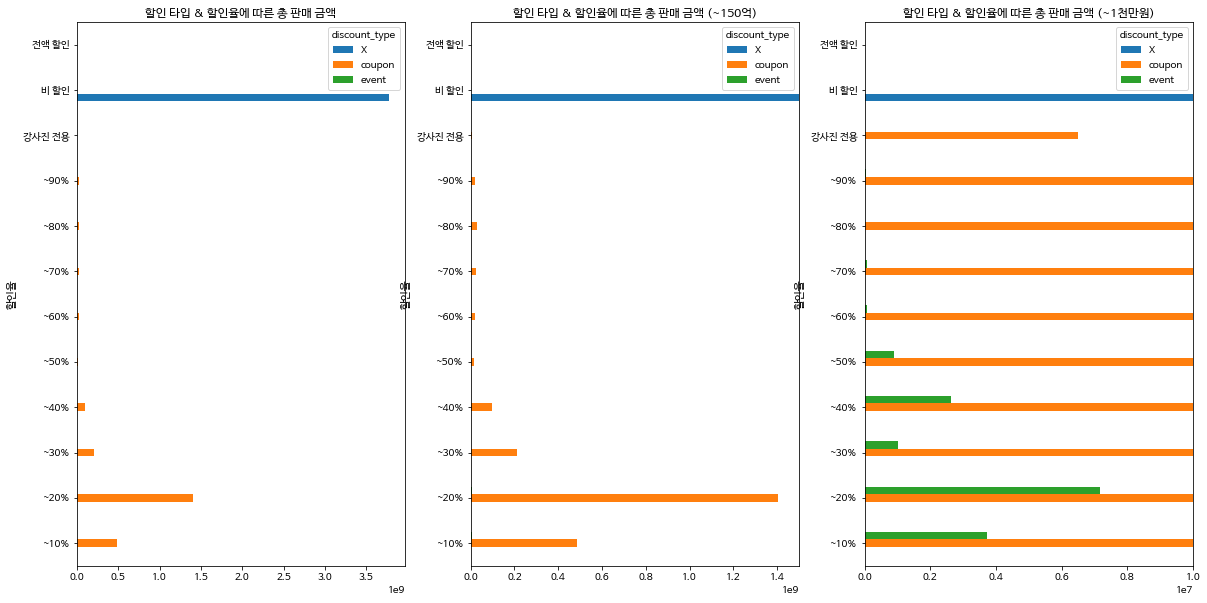

In [ ]:
#할인 타입 & 할인율에 따른 총 판매 금액 시각화
pdf1 =pdf2 = pdf3 = pd.pivot_table(df_onlypay,
                      index='discount_rate',
                      columns='discount_type',
                      values = 'transaction_amount',
                      aggfunc = 'sum')

plt.figure(figsize=(20,10))

graph_11 = plt.subplot(1,3,1)
pdf1 = pdf1.replace(np.NaN,0.0)
pdf1.plot(kind='barh', ax=graph_11)
plt.title('할인 타입 & 할인율에 따른 총 판매 금액')
plt.ylabel('할인율',fontsize = 11)

graph_12 = plt.subplot(1,3,2)
pdf2 = pdf1.replace(np.NaN,0.0)
pdf2.plot(kind='barh', ax=graph_12)
plt.xlim(0,1500000000)
plt.title('할인 타입 & 할인율에 따른 총 판매 금액 (~150억)')
plt.ylabel('할인율',fontsize = 11)

graph_13 = plt.subplot(1,3,3)
pdf3 = pdf1.replace(np.NaN,0.0)
pdf3.plot(kind='barh', ax=graph_13)
plt.xlim(0,10000000)
plt.title('할인 타입 & 할인율에 따른 총 판매 금액 (~1천만원)')
plt.ylabel('할인율',fontsize = 11)

'할인 타입별 할인율 분포' 그래프에서 20% 할인 결제율이 압도적으로 높았는데 실 매출은 예상치보다 낮게 나왔다.
주로 낮은 가격대의 강의에서 할인 쿠폰을 사용함을 알 수 있다.

In [ ]:
#할인 값에 따른 결제 비율
def func(x):
  if x == 0:
    return "0원"
  elif x <= 10000:
    return "10000원 이하"
  elif x <= 20000:
    return "10000원 초과 20000원 이하"
  elif x <= 30000:
    return "20000원 초과 30000원 이하"
  elif x <= 40000:
    return "30000원 초과 40000원 이하"
  elif x <= 50000:
    return "40000원 초과 50000원 이하"
  elif x > 50000:
    return "50000원 초과"
  else:
    return "NaN"
df['쿠폰_값'] = (df['coupon_discount_amount']).apply(func)

BA = []
BB = []
BC = []
BD = []
for i in ['0원','10000원 이하','10000원 초과 20000원 이하','20000원 초과 30000원 이하','30000원 초과 40000원 이하','40000원 초과 50000원 이하','50000원 초과','NaN']:
  BD.append(i)
  x = ((df['쿠폰_값'] == i) & (df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')).sum()
  BA.append(x)
  y = (df['쿠폰_값'] == i).sum()
  BB.append(y)
  z = ((df['쿠폰_값'] == i) & (df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')).sum() / (df['쿠폰_값'] == i).sum()
  BC.append(z)
시각화두번째 = pd.DataFrame({'payment개수':BA,
                          '전체개수':BB,
                          '비율':BC,
                          '할인가':BD})
시각화두번째

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in long_scalars


,payment개수,전체개수,비율,할인가
0,27510,70509,0.390163,0원
1,4473,6226,0.718439,10000원 이하
2,6733,9631,0.699097,10000원 초과 20000원 이하
3,3434,5031,0.682568,20000원 초과 30000원 이하
4,414,573,0.722513,30000원 초과 40000원 이하
5,897,1228,0.730456,40000원 초과 50000원 이하
6,7608,8791,0.865431,50000원 초과
7,0,0,NaN,NaN


할인 값에 따른 결제 비율과 갯수

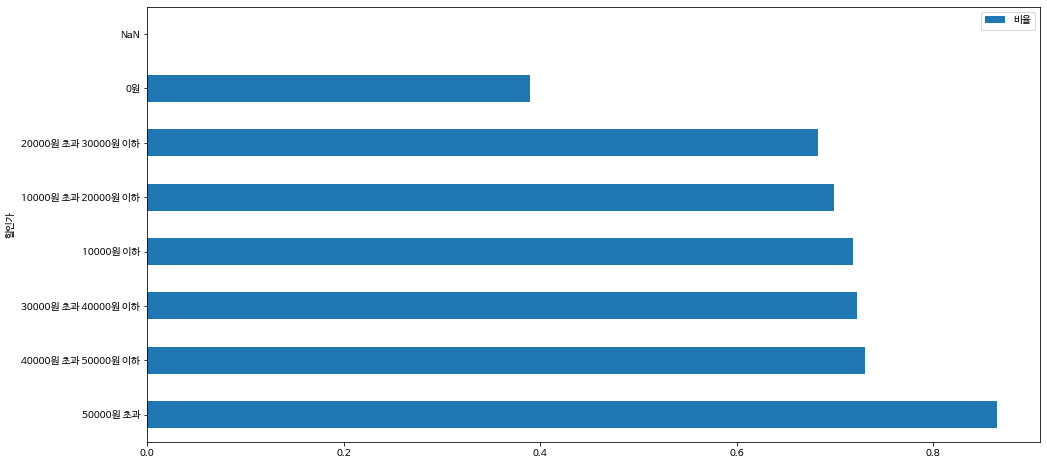

In [ ]:
#위에 있는 데이터프레임을 시각화
시각화두번째.sort_values(by=['비율'],ascending=False).plot.barh(x='할인가', y='비율', rot=0, figsize=(16,8))

결제 금액의 가격이 상승할수록 쿠폰 사용 빈도가 많아짐을 알 수 있다. 할인 금액이 5만원을 초과 할 때 특히 결제율이 높아짐을 알 수 있다.

2. 카테고리 별 할인율

In [ ]:
# category_title 별 subcategory_title로 나누기 (PAYMENT.COMPLETED : 실 구매자)

# 프로그래밍
cate1_df = df_pay[df_pay['category_title'] == '프로그래밍']

# 디자인
cate2_df = df_pay[df_pay['category_title'] == '디자인']

# 데이터사이언스
cate3_df = df_pay[df_pay['category_title'] == '데이터사이언스']

# 영상/ 3D
cate4_df = df_pay[df_pay['category_title'] == '영상/3D']

# 업무 생산성
cate5_df = df_pay[df_pay['category_title'] == '업무 생산성']

# 마케팅
cate6_df = df_pay[df_pay['category_title'] == '마케팅']

# 부동산 금융
cate7_df = df_pay[df_pay['category_title'] == '부동산/금융']

# 투자/재테크
cate8_df = df_pay[df_pay['category_title'] == '투자/재테크']


# 각 category_title 별, 할인 받은 raw 변수 만들고, (실 구매자 데이터 : cate1_df)
# 각 category_title 별, 할인 여부 시각화를 위한 column 추가
disco1 = cate1_df['transaction_amount'] < cate1_df['sale_price']
disco2 = cate2_df['transaction_amount'] < cate2_df['sale_price']
disco3 = cate3_df['transaction_amount'] < cate3_df['sale_price']
disco4 = cate4_df['transaction_amount'] < cate4_df['sale_price']
disco5 = cate5_df['transaction_amount'] < cate5_df['sale_price']
disco6 = cate6_df['transaction_amount'] < cate6_df['sale_price']
disco7 = cate7_df['transaction_amount'] < cate7_df['sale_price']
disco8 = cate8_df['transaction_amount'] < cate8_df['sale_price']

# 1
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate21_df = cate1_df['discount'] = disco1.map(func)

# 2
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate22_df = cate2_df['discount'] = disco2.map(func)

# 3
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate23_df = cate3_df['discount'] = disco3.map(func)

# 4
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate24_df = cate4_df['discount'] = disco4.map(func)

# 5
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate25_df = cate5_df['discount'] = disco5.map(func)

# 6
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate26_df = cate6_df['discount'] = disco6.map(func)

# 7
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate27_df = cate7_df['discount'] = disco7.map(func)

# 8
def func(x):
    if x == True:
        return 1
    else:
        return 0

cate28_df = cate8_df['discount'] = disco8.map(func)

Text(0.5, 1.0, '투자/재테크')

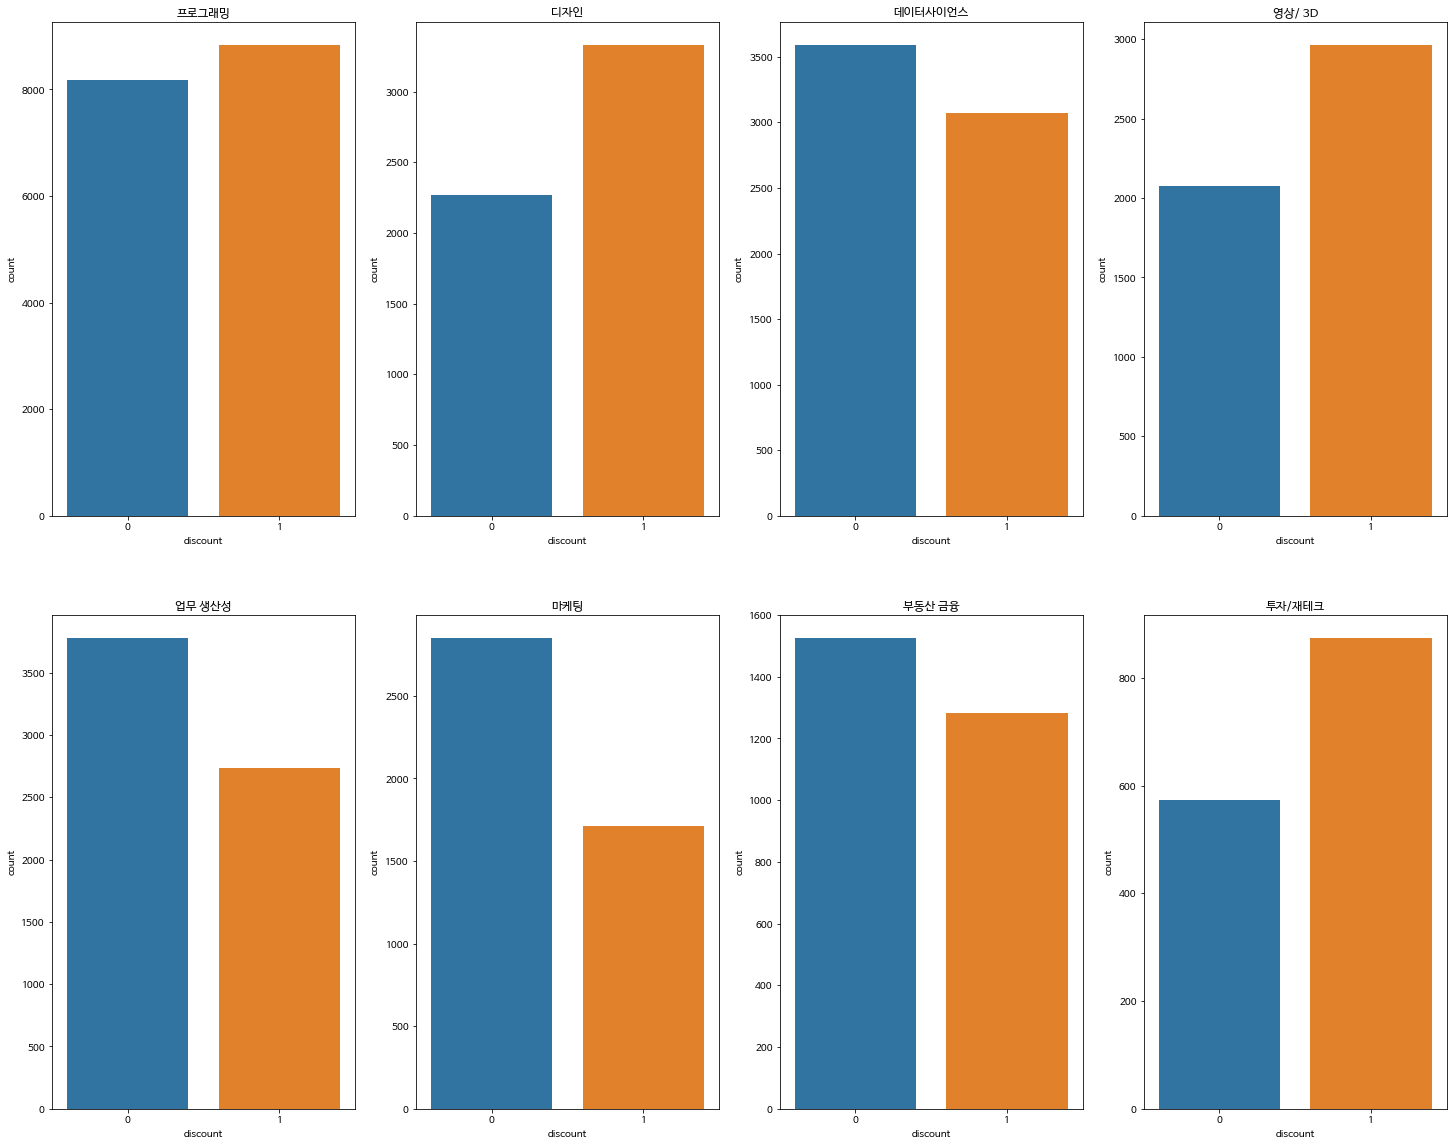

In [ ]:
# 실 구매자 중 category_title별, 할인 받은 count 개수 시각화
fig = plt.figure(figsize=(25,20))
graph11 = fig.add_subplot(2,4,1)
graph12 = fig.add_subplot(2,4,2)
graph13 = fig.add_subplot(2,4,3)
graph14 = fig.add_subplot(2,4,4)
graph15 = fig.add_subplot(2,4,5)
graph16 = fig.add_subplot(2,4,6)
graph17 = fig.add_subplot(2,4,7)
graph18 = fig.add_subplot(2,4,8)

sns.countplot(data=cate1_df, x='discount', ax=graph11)
graph11.set_title('프로그래밍')
sns.countplot(data=cate2_df, x='discount', ax=graph12)
graph12.set_title('디자인')
sns.countplot(data=cate3_df, x='discount', ax=graph13)
graph13.set_title('데이터사이언스')
sns.countplot(data=cate4_df, x='discount', ax=graph14)
graph14.set_title('영상/ 3D')
sns.countplot(data=cate5_df, x='discount', ax=graph15)
graph15.set_title('업무 생산성')
sns.countplot(data=cate6_df, x='discount', ax=graph16)
graph16.set_title('마케팅')
sns.countplot(data=cate7_df, x='discount', ax=graph17)
graph17.set_title('부동산 금융')
sns.countplot(data=cate8_df, x='discount', ax=graph18)
graph18.set_title('투자/재테크')

각 카테고리 별 할인받은 개수를 도식화 한 결과, '업무 생산성','마케팅','부동산 금융'은 할인을 안받더라도 결제를 많이 할 정도로 수요가 높았다. 
해당 과목들의 가격이 다른 강의에 비해 낮거나 수강과목의 주고객층이 직장인으로 예상되는데 그렇기에 경제적 여유가 있을것으로 생각되어 할인 쿠폰의 영향을 비교적 덜 받았다고 판단했다. 다만, 이용자 개개인의 경제력을 나타내는 지표는 없으므로 추가 분석이 필요하다. 

#재구매율
1. 웰컴쿠폰 사용자 중 카테고리별 구매기록 분석



>WELCOME 쿠폰 중복 수령자 유무확인

In [ ]:
#웰컴 쿠폰 중복 수령 사례 개수
중간단계 = df[(df['coupon_title'].str.contains('WELCOME')) | (df['coupon_title'].str.contains('웰컴'))]
세번째주제 = 중간단계[(중간단계['type'] == 'PAYMENT') & (중간단계['state'] == 'COMPLETED')]
print(len(세번째주제) - 세번째주제['customer_id'].nunique())

1167


In [ ]:
#웰컴 쿠폰 중복 수령한 서로 다른 사람 수
중간단계 = df[(df['coupon_title'].str.contains('WELCOME')) | (df['coupon_title'].str.contains('웰컴'))]
세번째주제 = 중간단계[(중간단계['type'] == 'PAYMENT') & (중간단계['state'] == 'COMPLETED')]
세번째주제[세번째주제.duplicated(['customer_id'])]['customer_id'].nunique()

924

웰컴 쿠폰 사용자 중 추가 결제율

>첫 구매 시 결제한 카테고리와 재유입 되어 결제한 카테고리 비교

In [ ]:
#세 컬럼의 값이 모두 일치하면 마지막 값을 제외하고 삭제.
df_total = df_total.drop_duplicates(['customer_id' , 'course_title' , 'coupon_title'],keep = 'last')

# 남아있는 REFUND는 제공된 데이터 기간 전에 결제를 완료하고, 제공된 기간 내에 환불이 완료된 데이터이다.
# 정해진 기간내의 환불 비율을 알고싶으므로 PAYMENT만 골라낸다.
df_pay = df_total['type'] == 'PAYMENT'
df_pay = df_total[df_pay]



# 결제 완료한 웰컴쿠폰 사용자 분류.
df_wcpc = df_pay[(df_pay['coupon_title'].str.contains('웰컴')) | (df_pay['coupon_title'].str.contains('WELCOME'))]

#중복값 제거
df_wp = df_wcpc.drop_duplicates(subset='customer_id')

# 결제 완료한 웰컴쿠폰 사용자의 customer_id만 추출
df_wcpc.drop_duplicates(['customer_id'],keep='first')
wpid = df_wcpc['customer_id'].unique()

# 위 customer_id 추출내역을 DataFrame으로 변환
df_newuser_group = pd.DataFrame(wpid, columns=['customer_id'])



# 결제 완료된 항목에서 웰컴쿠폰 사용자 제하기.
spac = df_pay[(df_pay['coupon_title'].str.contains('웰컴')) | (df_pay['coupon_title'].str.contains('WELCOME'))].index
df_pay.drop(spac,inplace=True)

# 웰컴쿠폰을 사용한 결제자의 아이디를 기준으로 전체 결제 내역에서 동일 결제자의 결제내역을 가져온다. --> 순 재결제자들의 결제내역들
df_tt = pd.merge(df_pay, df_newuser_group, on = 'customer_id')

# 재결제자들의 내역에서 중복되는 아이디 제거.
df_ttd = df_tt.drop_duplicates(subset='customer_id')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


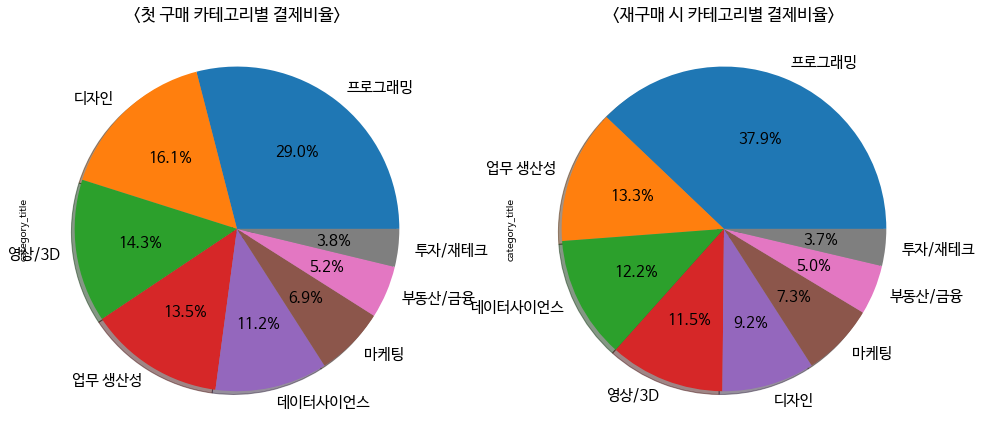

In [ ]:
# 첫 구매 시 결제한 카테고리와 재유입 되어 결제한 카테고리 비교 시각화
fig = plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.title('<첫 구매 카테고리별 결제비율>',fontsize = 17)
df_wp['category_title'].value_counts().plot.pie(autopct='%1.1f%%',fontsize = 15, shadow=True)
plt.rcParams["figure.figsize"] = (20, 10)

plt.subplot(1,2,2)
plt.title('<재구매 시 카테고리별 결제비율>',fontsize = 17)
df_ttd['category_title'].value_counts().plot.pie(autopct='%1.1f%%',fontsize = 15, shadow=True)
plt.rcParams["figure.figsize"] = (20, 10)

plt.show()

웰컴쿠폰을 통해 유입된 신규 이용자들이 대체적으로 비슷한 구매분포를 보였는데, 

'프로그래밍'의 경우 추가 결제량이 증가한 모습을 보였고, '디자인','영상/3D'은 감소하였다.

프로그래밍은 학습 만족도가 높아 수요도가 상승함을 알 수 있고 반대로 '디자인','영상/3D'의 경우에는 수강생들의 만족도를 충족시키지 못해 수요가 감소함을 알 수 있다. 개선이 필요해보인다.

In [ ]:
# 할인쿠폰 사용
wcu = (df_ttd['coupon_title'] != 'NaN')
df_welcom_after_O = df_ttd[wcu]
df_welcom_after_O['after'] = '쿠폰O'

# 할인쿠폰 사용 안함
wcd = (df_ttd['coupon_title'] == 'NaN')
df_welcom_after_X = df_ttd[wcd]
df_welcom_after_X['after'] = '쿠폰X'

#할인쿠폰 사용/미사용 그룹 통합
df_welcom_after = pd.concat([df_welcom_after_O,df_welcom_after_X])
df_welcom_after

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,customer_id,course_id,type,state,course_title,category_title,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,after
4,469863.0,202566.0,PAYMENT,COMPLETED,올인원 패키지 : 스케치&피그마를 활용한 모바일 UI 디자인,디자인,101500,[럭키룰렛] 올인원패키지,20000.0,121500.0,NaN,CARD,UX/UI,쿠폰O
12,462989.0,201520.0,PAYMENT,COMPLETED,올인원 패키지 : AWS/Docker 클라우드 서버 구축,프로그래밍,1000,수강생 50만명 돌파 기념 감사제 쿠폰,105500.0,106500.0,NaN,CARD,DevOps,쿠폰O
15,440315.0,201435.0,PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,0,수강생 50만명 돌파 기념 감사제 쿠폰,115500.0,110500.0,NaN,PROMOTION,개발자 커리어,쿠폰O
21,457918.0,202357.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인을 위한 파이썬 데이터분석,데이터사이언스,0,수강생 50만명 돌파 기념 감사제 쿠폰,119500.0,119500.0,NaN,PROMOTION,데이터분석,쿠폰O
28,464927.0,200543.0,PAYMENT,COMPLETED,올인원 패키지 : 프론트엔드 (React),프로그래밍,21500,수강생 50만명 돌파 기념 감사제 쿠폰,119000.0,140500.0,NaN,CARD,NaN,쿠폰O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,613775.0,NaN,PAYMENT,COMPLETED,프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스),데이터사이언스,1800000,NaN,0.0,1800000.0,INICIS,CARD,NaN,쿠폰X
2469,525701.0,206717.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영,프로그래밍,168000,NaN,0.0,168000.0,INICIS,CARD,DevOps,쿠폰X
2470,599109.0,205949.0,PAYMENT,COMPLETED,초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift,프로그래밍,171000,NaN,0.0,171000.0,INICIS,CARD,모바일앱,쿠폰X
2472,543401.0,205421.0,PAYMENT,COMPLETED,올인원 패키지 : 박은종의 객체지향 설계를 위한 디자인패턴 with 자바,프로그래밍,130000,NaN,0.0,130000.0,INICIS,CARD,DevOps,쿠폰X


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f713d3ad510>,
 [Text(0, 0, '쿠폰X'), Text(0, 0, '쿠폰O')])

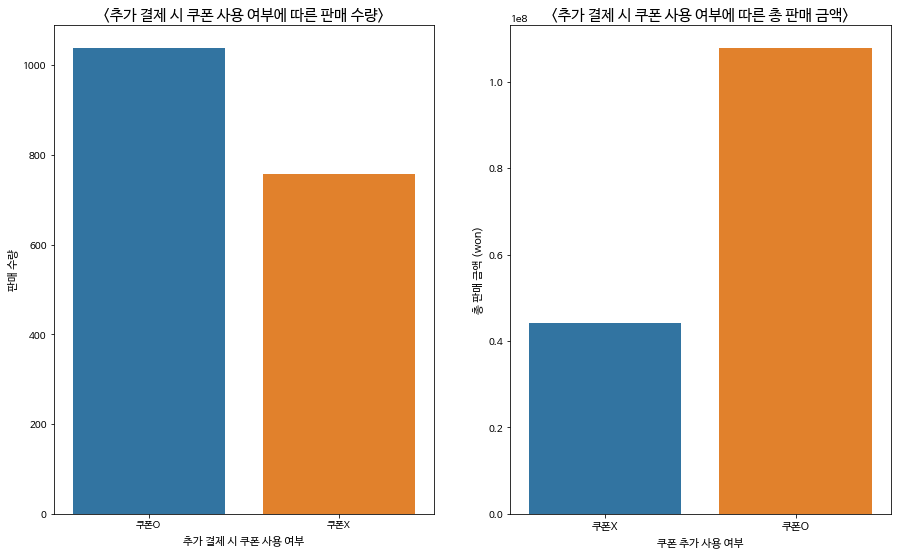

In [ ]:
#웰컴쿠폰 사용 후 추가 구매시 쿠폰 사용 여부에 따른 판매 수량
plt.figure(figsize=(15, 9))

plt.subplot(1,2,1)
sns.countplot(data=df_welcom_after,x='after')
plt.title('<추가 결제 시 쿠폰 사용 여부에 따른 판매 수량>',fontsize =15)
plt.xlabel('추가 결제 시 쿠폰 사용 여부',fontsize = 11)
plt.ylabel('판매 수량',fontsize = 11)


#웰컴쿠폰 사용 후 추가 쿠폰 사용 여부에 따른 총 판매 금액
revenue_of_welcome = df_welcom_after.groupby('after').transaction_amount.sum()

plt.subplot(1,2,2)
labels = ['쿠폰X','쿠폰O']
index = np.arange(len(labels))
sns.barplot(index,revenue_of_welcome)
plt.title('<추가 결제 시 쿠폰 사용 여부에 따른 총 판매 금액>',fontsize = 15)
plt.xlabel('쿠폰 추가 사용 여부',fontsize = 11)
plt.ylabel('총 판매 금액 (won)',fontsize = 11)
plt.xticks(index,labels,fontsize = 11)

웰컴쿠폰 사용 후에 추가 결제를 할 때도 할인쿠폰이 큰 영향을 미치는 것을 알 수 있다. 

쿠폰을 사용하면 정가보다 매출이 낮아져 총 매출이 적게 나올 것이라 예상했지만, 데이터를 분석해본결과 쿠폰을 사용한 그룹이 결제량도 많았고 더 많은 매출을 기록했다.

2. 동일한 결제 수단으로 결제 여부

In [ ]:
#같은 결제 수단이 이용된 사건의 개수
EA = []
EB = []
EC = []
ED = []
indexes = [6, 7]
brandnew = np.delete(df['method'].unique(), indexes)
for i in brandnew:
  x = len(df[(df['state'] == 'COMPLETED') & (df['type'] == 'PAYMENT') & (df['method'] == i)])
  EA.append(x)
  y = len(df[(df['state'] == 'COMPLETED') & (df['type'] == 'PAYMENT') & (df['method'] == i)]
          [df[(df['state'] == 'COMPLETED') & (df['type'] == 'PAYMENT') & (df['method'] == i)].duplicated(['customer_id'])])
  EB.append(y)
  ED.append(y / x)
  EC.append(i)

시각화다섯번째 = pd.DataFrame({'결제수단 개수':EA,
                          '같은 결제수단 사건 횟수':EB,
                          '그 비율':ED,
                          '결제수단 이름':EC})
시각화다섯번째

,결제수단 개수,같은 결제수단 사건 횟수,그 비율,결제수단 이름
0,2995,430,0.143573,VBANK
1,34421,7714,0.224107,CARD
2,626,83,0.132588,TRANS
3,4715,700,0.148462,PROMOTION
4,735,125,0.170068,TRANSFER
5,133,72,0.541353,ONSITE
6,5,3,0.600000,VOUCHER


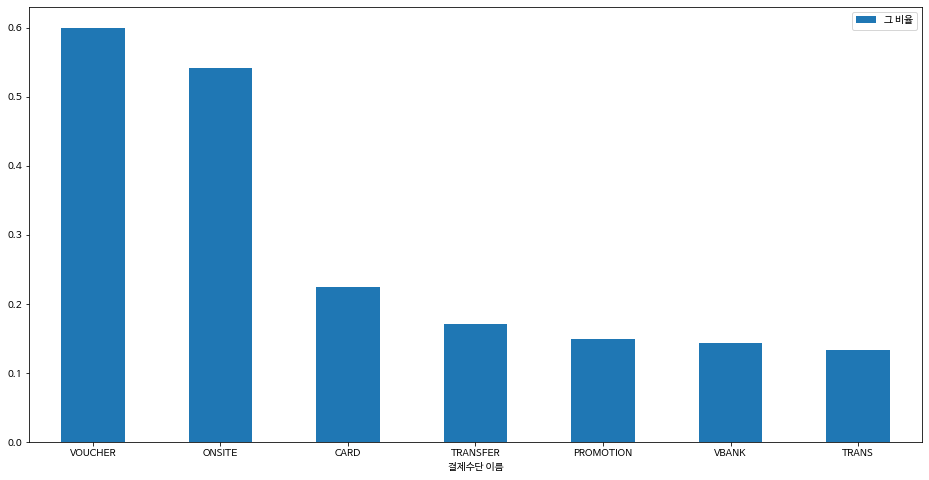

In [ ]:
#동일한 결제 수단으로 결제 여부 시각화
시각화다섯번째.sort_values(by=['그 비율'],ascending=False).plot.bar(x='결제수단 이름', y='그 비율', rot=0, figsize=(16,8))

상품권으로 구매를 한 사람들은 다음에 구매를 진행할 때도 상품권을 통해 결제하는 경향을 확인했다.

상품권 결제자들의 더 많은 결제를 이끌어내기위해 상품권 결제 시 추가 할인 이벤트를 진행하면 더 많은 매출을 이끌어낼 수 있을 것이다.

현장결제의 경우는 보통 기업간의 계약을 통해 진행된 경우인데, 단골 기업일수록 추가 혜택을 줘서 지속적인 거래가 이뤄지도록 노력이 필요하다.

#강의 가격
1. 카테고리별 가격대에 따른 실 판매량 분석

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


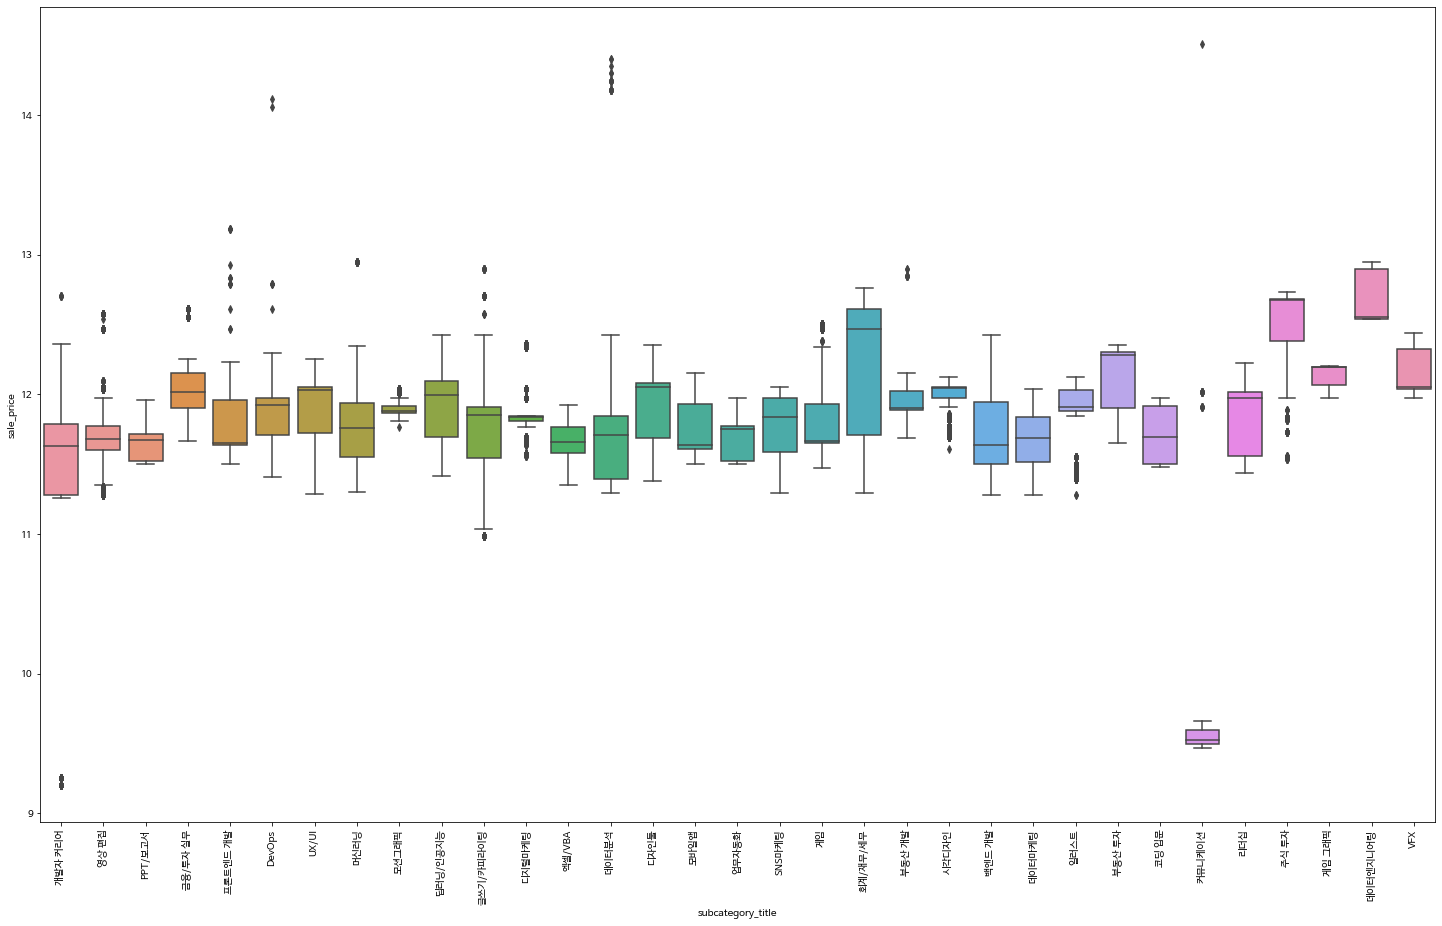

In [ ]:
#서브 카테고리마다 sale_price 기준 box plot 그리기
df['sale_price'] = np.log(df['sale_price'])
plt.figure(figsize=(25,15))
plt.xticks(rotation = 90)
sns.boxplot(data=df, x='subcategory_title', y='sale_price')
plt.show()

>카테고리 별 강의수

           category_title
course_id  프로그래밍             13042
           데이터사이언스            4798
           업무 생산성             4731
           디자인                3702
           마케팅                3576
           영상/3D              3378
           부동산/금융             2078
           투자/재테크             1001
dtype: int64


Text(0, 0.5, 'counts')

<Figure size 720x432 with 0 Axes>

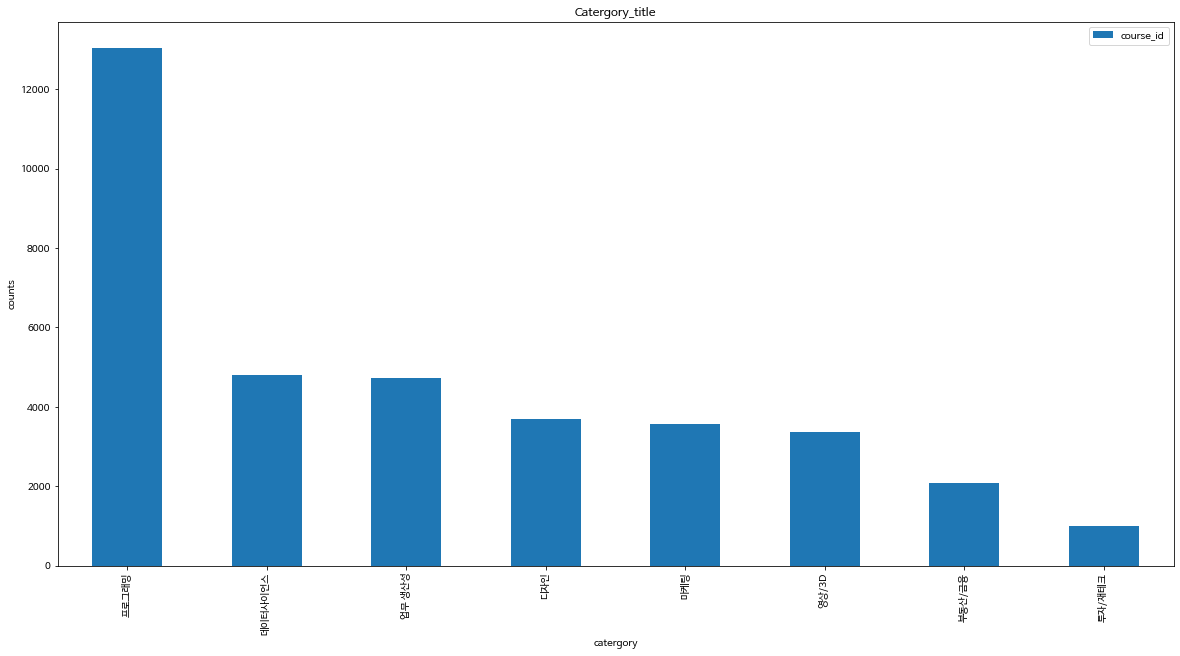

In [ ]:
# 카테고리 별 강의수
df_category = df_pay.groupby('category_title')['course_id'].count().sort_values(ascending = False).to_frame()
print(df_category.unstack())

# 카테고리 별 강의수 시각화
plt.figure(figsize=(10,6))
df_category.plot(kind='bar')
plt.title("Catergory_title")
plt.xlabel("catergory")
plt.ylabel("counts")

카테고리별 강의 가격 비교

           subcategory_title
course_id  백엔드 개발               2678
           개발자 커리어              2246
           프론트엔드 개발             1864
           모바일앱                 1261
           DevOps               1034
           게임                    637
           코딩 입문                 293
dtype: int64


Text(0, 0.5, 'counts')

<Figure size 720x432 with 0 Axes>

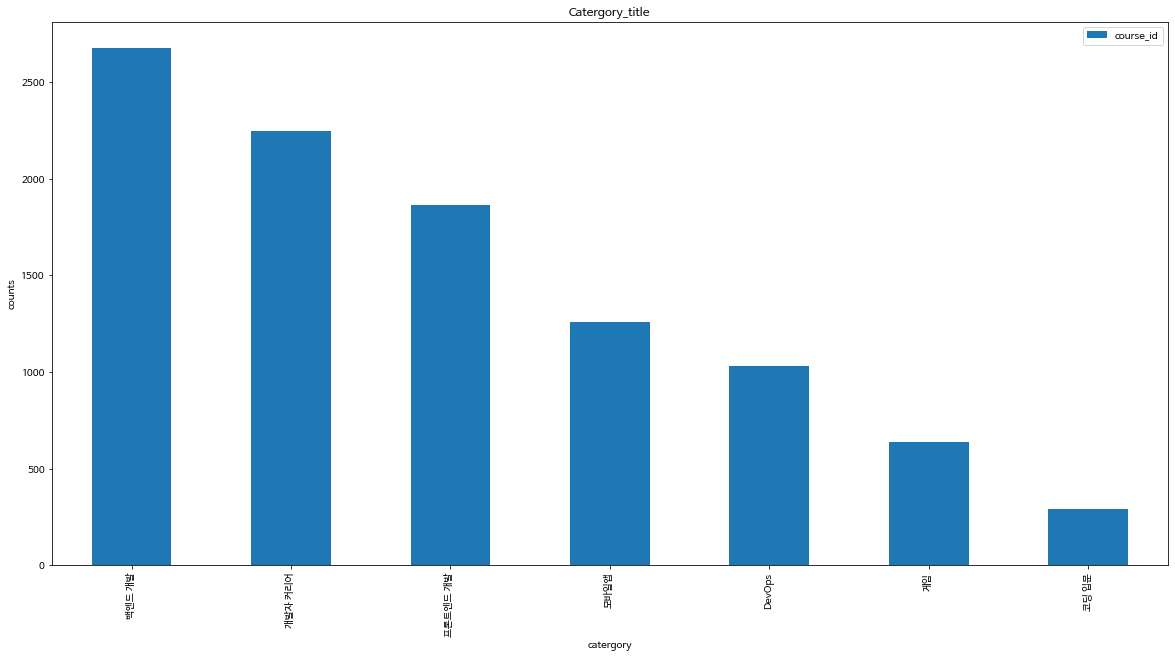

In [ ]:
#1 프로그래밍 카테고리
df_prog = df_pay[df_pay['category_title'] == '프로그래밍']
df_prog_subcategory = df_prog.groupby('subcategory_title')['course_id'].count().sort_values(ascending = False).to_frame()
print(df_prog_subcategory.unstack())

#1 프로그래밍 카테고리 시각화
plt.figure(figsize=(10,6))
df_prog_subcategory.plot(kind='bar')
plt.title("Catergory_title")
plt.xlabel("catergory")
plt.ylabel("counts")

In [ ]:
#2 카테고리가 프로그래밍인 강의중에서 course_title이 같으면 같은강의라 생각하고 중복을 제거 -> 203개
df_id = df_prog[['course_title','course_id','sale_price','subcategory_title','coupon_title']]
df_dup = df_id.drop_duplicates(['course_title'])
df_dup.sort_values('course_id', ascending = False)

,course_title,course_id,sale_price,subcategory_title,coupon_title
50708,(B2B) K-Digital Credit Python&Django로 시작하는 웹 프...,207655.0,45000.0,NaN,NaN
49828,(B2B) K-Digital Credit Java & SpringBoot로 시작하는...,207654.0,40000.0,NaN,NaN
50383,(B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_6기,207652.0,30000.0,NaN,NaN
50720,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_6기,207651.0,30000.0,NaN,NaN
50221,(B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_6기,207648.0,20000.0,NaN,NaN
...,...,...,...,...,...
50220,프로모션 : iOS 개발 맥북 pro 패스(9월 현물 프리패스),NaN,1800000.0,NaN,NaN
50251,프로모션 : 풀스택 개발자 맥북 air 패스(9월 현물 프리패스),NaN,1400000.0,NaN,NaN
50283,프로모션 : 프론트엔드 맥북 pro 패스 (9월 현물 프리패스),NaN,1800000.0,NaN,NaN
50333,프로모션 : 프론트엔드 맥북 air 패스 (9월 현물 프리패스),NaN,1400000.0,NaN,NaN


In [ ]:
#같은 이름의 강의지만 가격이 다른 경우
A = df_prog.groupby('course_title')['sale_price']
A.apply(set).to_frame()

,sale_price
course_title,
(B2B) (주)마음의선물 온라인 구독 패키지 플랜 - 비대면바우처,{0.0}
(B2B) (주)아르케 온라인 구독 패키지 플랜 - 비대면바우처,{0.0}
(B2B) (주)유투바이오 온라인 구독 패키지 플랜 - 비대면바우처,{0.0}
(B2B) (주)이멕스테크 온라인 구독 패키지 플랜 - 비대면바우처,{0.0}
(B2B) (주)이타넷 온라인 구독 패키지 플랜 - 비대면바우처,{0.0}
...,...
프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),{299000.0}
프론트엔드 개발자 되기 온라인 완주반 3기,"{610000.0, 620000.0}"
프론트엔드 개발자 되기 온라인 완주반 4기,"{580000.0, 620000.0, 590000.0, 610000.0}"


나머지 7카테고리도 같은 과정 반복 (생략)

같은 강의지만 가격이 다른 판매 내역이 존재한다. 하지만 왜 가격이 다른지는 주어진 데이터로는 분석이 불가했고, 강의 판매가격이 매출에 직접적으로 영향을 끼쳤는지 판단하기에는 불가했다. 

# 결과
>매출에 영향을 끼치는 요인을 분석해본 결과, 

구매자들의 결제에 직접적인 영향을 주는 요인으로는 '할인 혜택' '강의 수요도'라는 결론을 내렸다.


- '강의 수요도'는 인기 과목일수록 수요가 많아 매출이 높을 것이라 예상을 했는데,
분석 결과 실제로도 인기가 많은 과목일수록 결제량도 많았고 총 매출도 높게 나왔다.
다만 환불률도 많게 나왔는데 수강생들의 수요가 무엇인지 빠르게 파악할 수 있도록 대책방안이 필요해보인다.

- '할인 혜택'은 쿠폰 할인과 각종 이벤트를 통해 구매자들의 구매 유도를 이끌것이라 생각했는데,
실제로도 할인 쿠폰을 사용 후 추가 구매를 진행할 때 쿠폰의 유무가 결제에 영향을 끼치는 것을 볼 수 있었다.
쿠폰 미사용자가 생각보다 적어서 더 많은 쿠폰 할인을 진행하면 더 큰 매출을 올릴 수 있을 것이다.

- '추가 결제율'의 경우 기존 유저들의 지속적인 결제가 이루어진다면 고정적인 고객층이 확보되어 매출에 영향을 줄 것이라 생각했지만, '프로그래밍'과목을 제외하고는 대체로 결제가 감소한 추세를 보였다. 그렇기때문에 단골 이용자를 확보하기위해 많이 구매할수록 혜택을 주는 이벤트를 진행하거나 기존에 진행하는 페이백 이벤트의 범위를 확장하는 방안을 고려해보면 좋을 것 같다.

- '강의가격'은 금액이 낮으면 구매율이 많아져 매출이 증가할 것이라 생각했지만, 실제로는 강의의 가격이 주된 요인이 아니라 부수적으로 고려되는 사항이었다. 강의의 가격보다는 사용자들의 개인적 필요나 동기에 따라 구매가 진행되었으므로 고객 선호도 조사같은 정기적인 설문조사를 진행함이 좋을 것 같다.  


